**Problem:**

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Importing all necessary Liabaries

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [ ]:
#!pip install --upgrade scikit-learn

**Data Ingestion:**
1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.


In [3]:
df = pd.read_excel('Election_Data.xlsx')

**Making Initial run for initial analysis. **


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [5]:
df.shape

(1525, 9)

In [6]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
## Recheck the unique values
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




Data has 1525 rows and 9 columns in it.

there are 8 numrical and 2 object dtype in it.


there is unnamed column which seems to be the index which we might decide to drop later on.


there is unnamed column which seems to be the index which we might decide to drop later on.

have separated CAT and NUM columns to perform Univariate and Bivariate Analysis.

**1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.**

EDA

There are 8 duplicate values present and same needs to be deleted.

There seems to be no missing data.

Data is skwed slighty towards both sides.


In [9]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
# Are there any missing values ?
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
df.skew()

<ipython-input-12-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

**Univariate and Bivariate Analysis**

**Univariate Analysis **

As per below plots, it is quote evident that most of the voters are between the age group of 40-65

Voters, current economic conditions both national and Household levels seems to having fairly good assessment.

As per the below analysis it seems assessment on labour leader is little better as compared to consecutive leader.

Majority of the respondents seems to having high Eurosceptic sentiments, they will favor the one support disengagement like "Brixit" with EU countries.

Respondants have farily good knowledge of partie's positions on European integration.

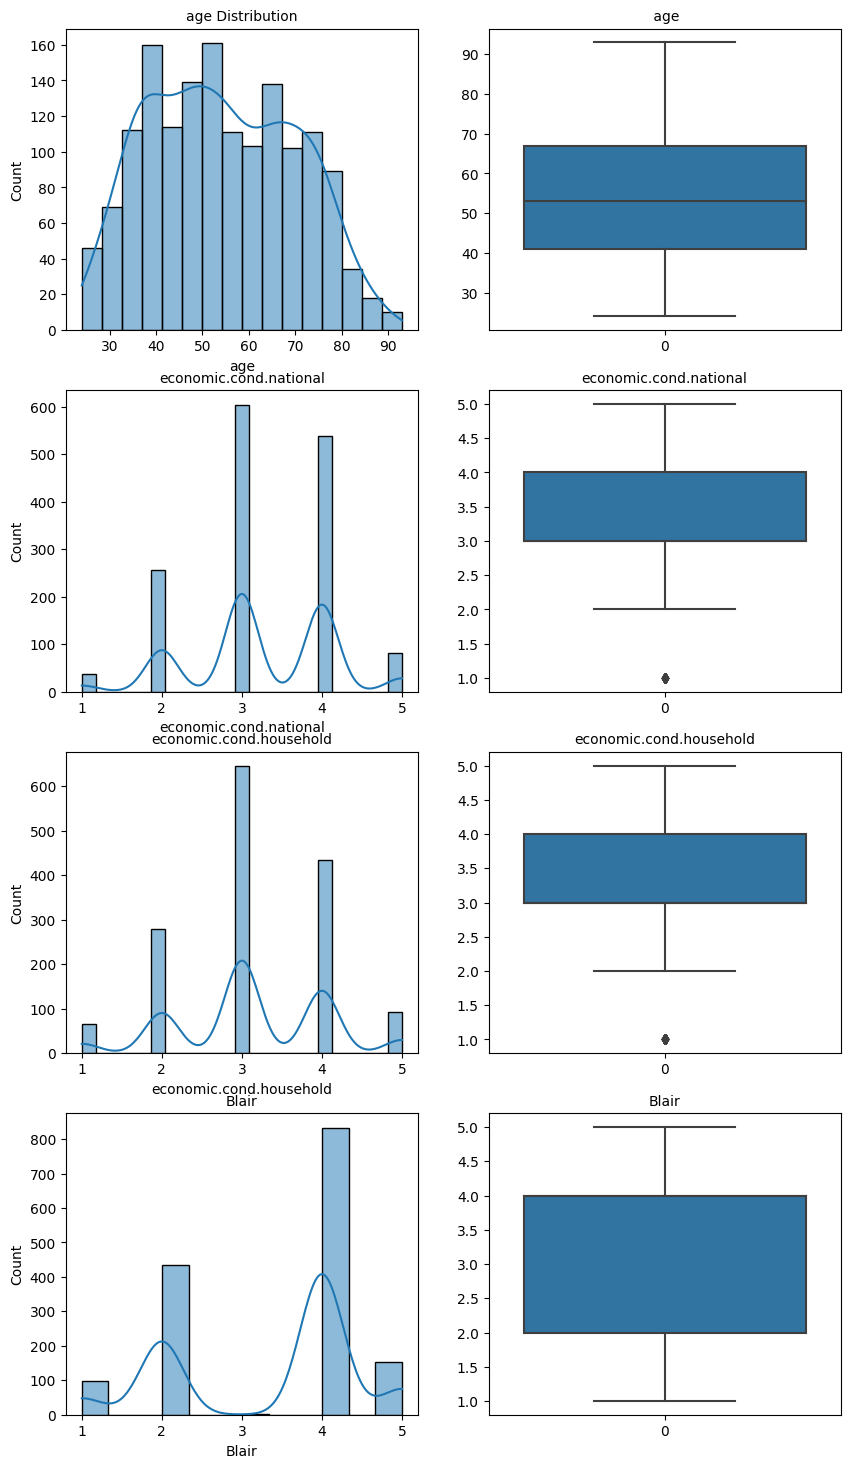

In [13]:
#df['vote'].value_counts().plot.bar();
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.histplot(df['age'] , ax=axes[0][0],kde=True)
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age",fontsize=10)

a = sns.histplot(df['economic.cond.national'] , ax=axes[1][0],kde=True)
a.set_title("economic.cond.national",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national",fontsize=10)


a = sns.histplot(df['economic.cond.household'] , ax=axes[2][0],kde=True)
a.set_title("economic.cond.household",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household",fontsize=10)


a = sns.histplot(df['Blair'] , ax=axes[3][0],kde=True)
a.set_title("Blair",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair",fontsize=10)

plt.show()

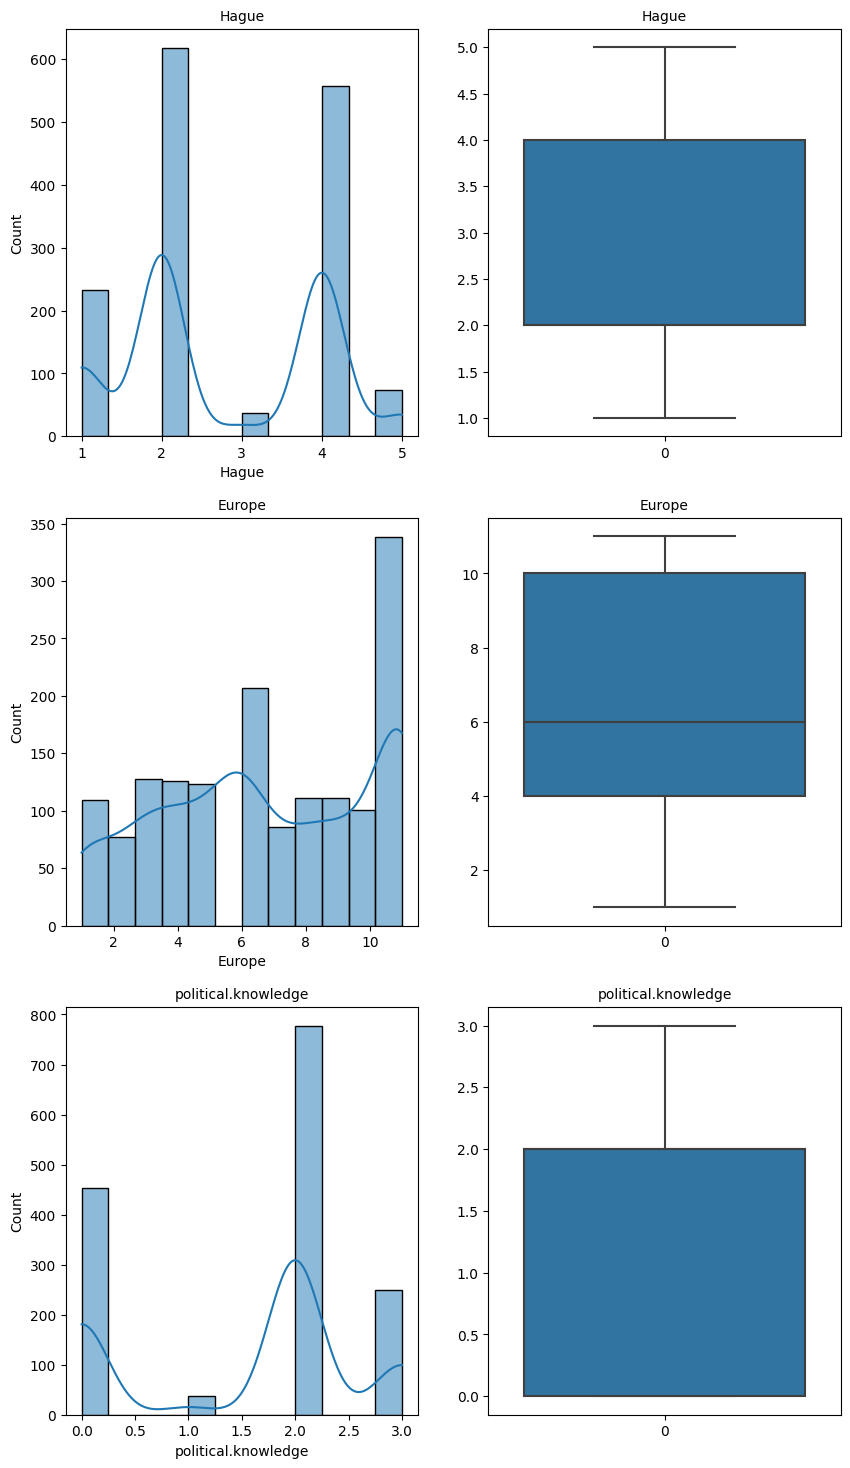

In [14]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.histplot(df['Hague'] , ax=axes[0][0],kde=True)
a.set_title("Hague",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague",fontsize=10)

a = sns.histplot(df['Europe'] , ax=axes[1][0],kde=True)
a.set_title("Europe",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe",fontsize=10)


a = sns.histplot(df['political.knowledge'] , ax=axes[2][0],kde=True)
a.set_title("political.knowledge",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political.knowledge",fontsize=10)


plt.show()

**`Bivariate Analysis`**

Bivariate analysis is the simultaneous analysis of the variables. It explores the concept of relationships between the two, whether there exists an association and the strength of this association, or whether there are differences between and the significance of the same. On performing the bivariate analysis between “Vote” and “Age” variables we can notice the young population have less probability to vote Conservative as well the old aged.  

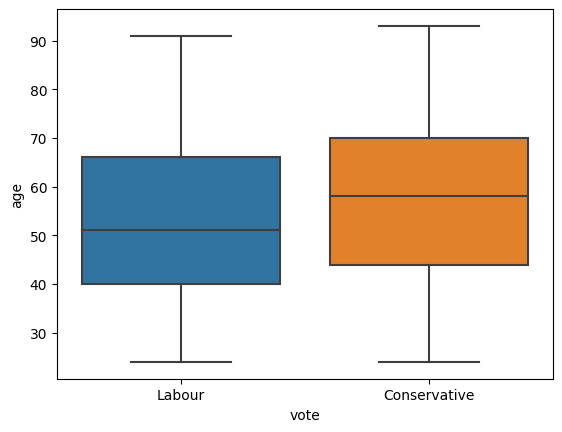

In [15]:
sns.boxplot(x='vote', y='age', data=df);

Voters having higher Assessment of current national economic and Household conditions likely to vote for labour parrty.

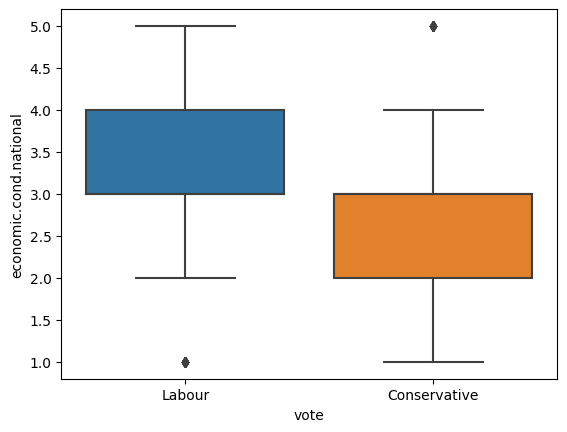

In [16]:
sns.boxplot(x='vote', y='economic.cond.national', data=df);

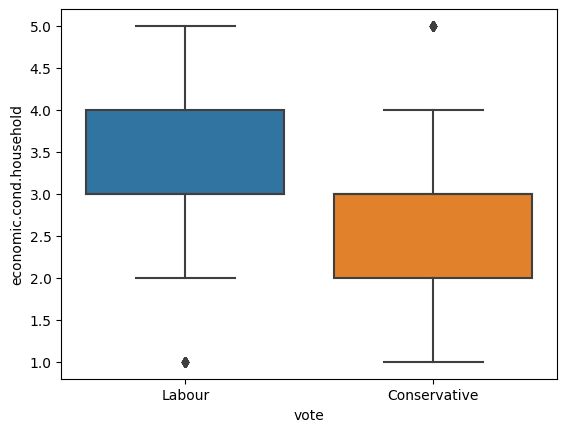

In [17]:
sns.boxplot(x='vote', y='economic.cond.household', data=df);

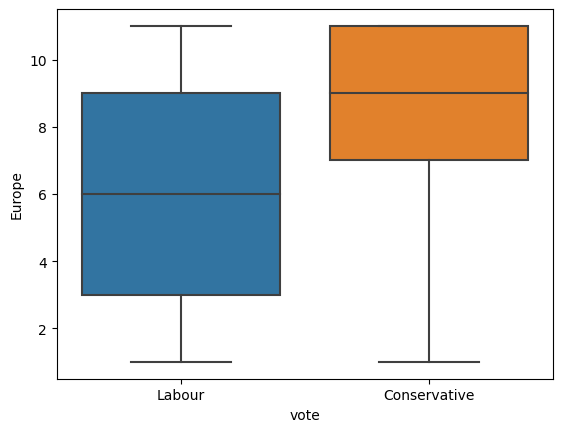

In [18]:
sns.boxplot(x='vote', y='Europe', data=df);

Heat map shows no significant corelation between variables

<ipython-input-19-bb9697b0a5d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


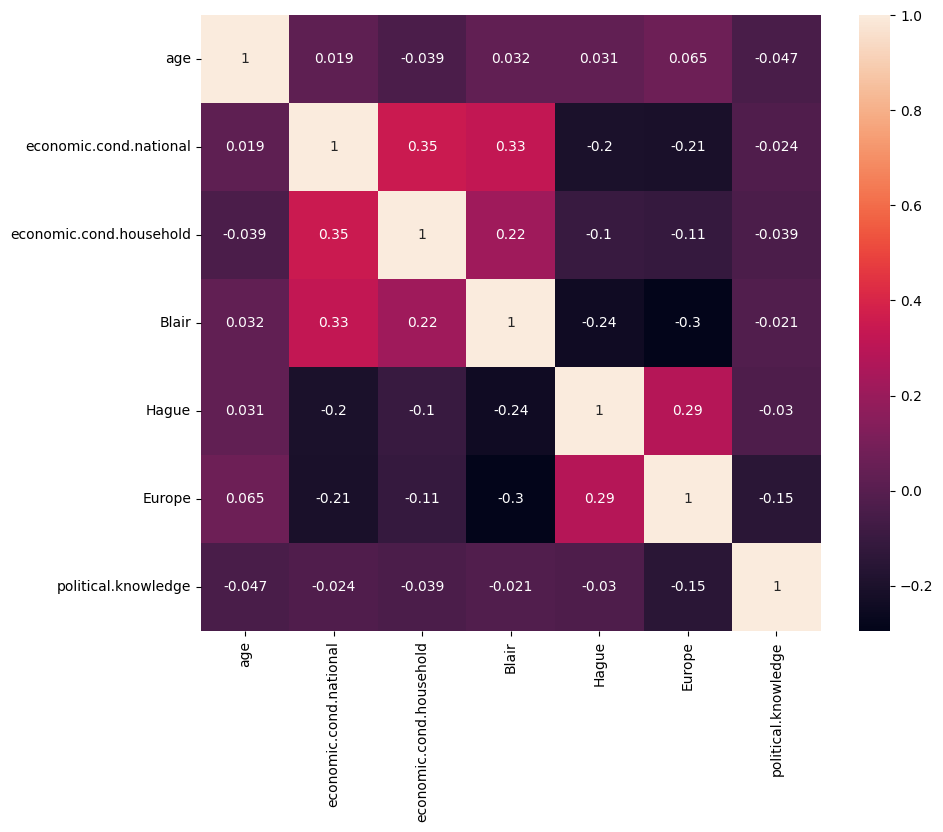

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Checking for outliers**

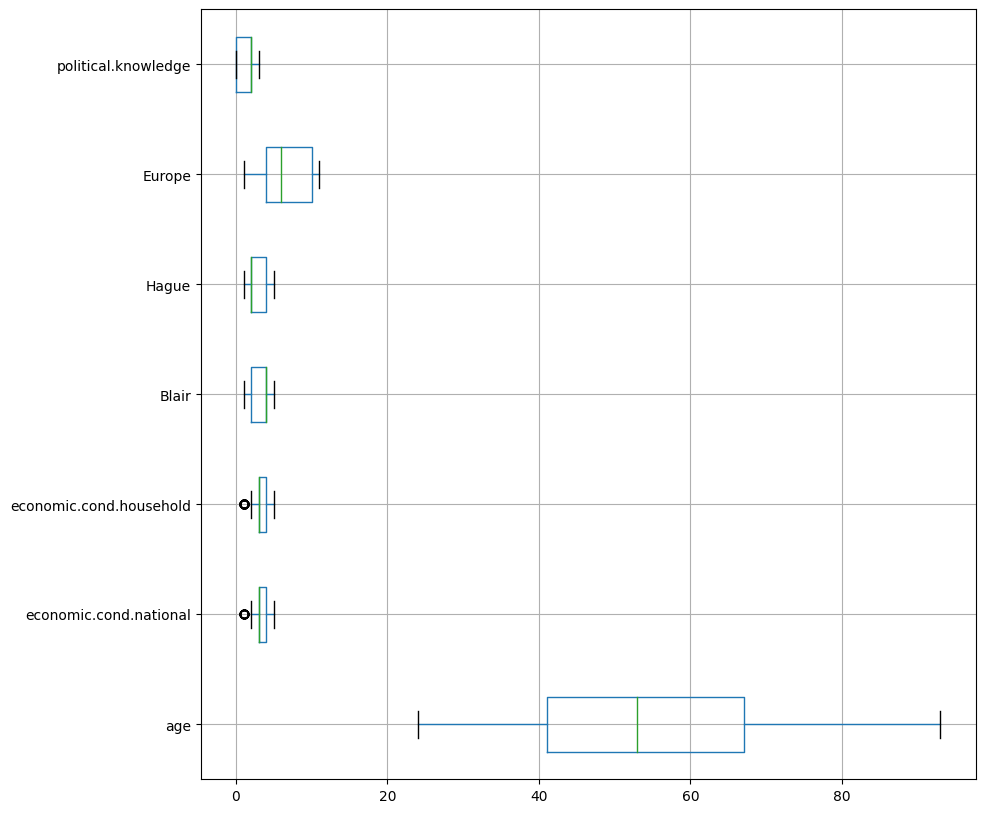

In [20]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,:9].boxplot(vert=0)
plt.show()

No Outlires present in to the DataF.

**Data Preparation:**

1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).


**Encoding**

## Converting the other 'object' type variables as dummy variables

In [21]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [22]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 130.1 KB


**Checking data for scaling**

It observed that data scaling isnt necessary for our model building

**Split the data into train and test (70:30).**

In [23]:
# capture the target column ("default") into separate vectors for training set and test set
#X = df.drop("vote" , axis=1)
#y = df.pop("vote")
# Copy all the predictor variables into X dataframe
X = df_dummy.drop('vote_Labour', axis=1)
y = df_dummy['vote_Labour']

In [24]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote_Labour, dtype: uint8

In [26]:
#importing liabary
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


**Train & test Split**

In [27]:
# Copy all the predictor variables into X dataframe
X = df_dummy.drop('vote_Labour', axis=1)

# Copy target into the y dataframe.
y = df_dummy['vote_Labour']

In [28]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df_dummy['vote_Labour'])

In [29]:
y_train.value_counts(1)

1    0.696513
0    0.303487
Name: vote_Labour, dtype: float64

In [30]:
y_test.value_counts(1)

1    0.697368
0    0.302632
Name: vote_Labour, dtype: float64

**Modeling:**

1.4 Apply Logistic Regression and LDA (linear discriminant analysis).


**Building Logistic Regression & LDA Models**



**Logistic Regression**

In [31]:
#Prediction of train data
model= LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

**Predicting on Training dataset**

In [32]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [33]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.199510,0.800490
1,0.610744,0.389256
2,0.083468,0.916532
3,0.030816,0.969184
4,0.135993,0.864007


**Model Evaluation **

In [34]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.827521206409048

AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction

**AUC and ROC for the training data**

AUC: 0.877


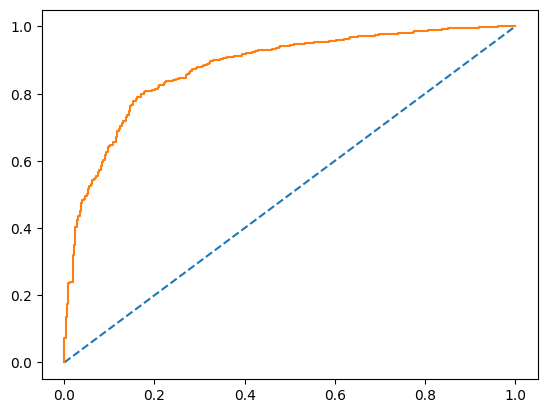

In [35]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [36]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8552631578947368

**AUC and ROC for the test data**

AUC: 0.913


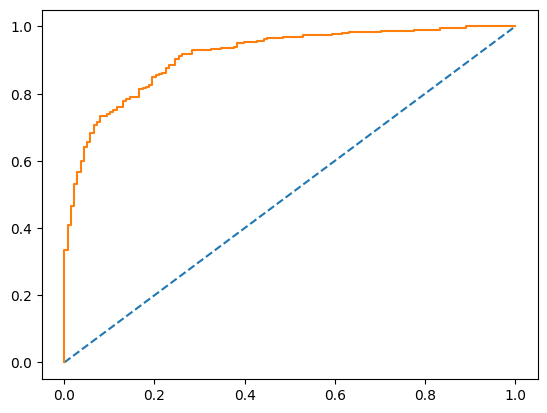

In [37]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Confusion Matrix for training data**

**Confusion Matrix for training and test data**

In [38]:
confusion_matrix(y_train, ytrain_predict)

array([[213, 109],
       [ 74, 665]])

In [39]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [40]:
confusion_matrix(y_test, ytest_predict)

array([[ 94,  44],
       [ 22, 296]])

In [41]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



Model Score has predicted 83% train and 86% on test data.

AUC towards 1 indicates that model has performed well here.


For predicting to vote  (Label 0 )to Conservative :
   
   <b/>Precision (81%) – 81% of the population will vote for conservatives.  
   
   <b/>Recall (68%) – Out of all population will vote for conservatives.  
    
For predicting to Vote Labour (Label 1):

   <b/>Precision (87%) – 87% of the population will vote for Labour.  
   
   <b/>Recall (87%) – 87% Out of all population will vote for Labour.

**LDA (linear discriminant analysis)**

Building a LDA model and use this model to predict on the test set and compute the confusion matrix.

In [42]:
LDAM = LinearDiscriminantAnalysis()
model1=LDAM.fit(X_train,y_train)
model1

LinearDiscriminantAnalysis()


**Performance Matrix on train data set**

In [43]:
y_train_predict = LDAM.predict(X_train)
model_score = LDAM.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.822808671065033
[[217 105]
 [ 83 656]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



**Performance Matrix on test data set**

In [44]:

y_test_predict = LDAM.predict(X_test)
model_score = LDAM.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8530701754385965
[[ 95  43]
 [ 24 294]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



**AUC and ROC for the training data**


AUC: 0.877


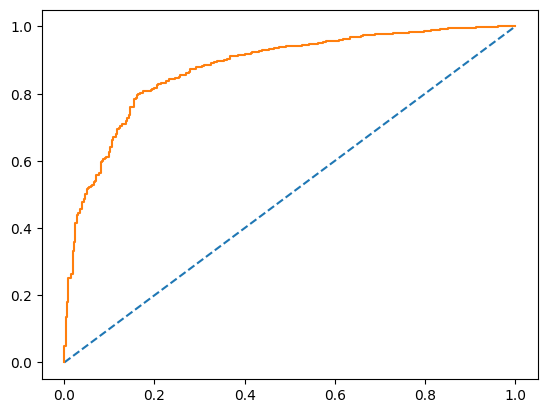

In [45]:
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

**AUC and ROC for the test data**

AUC: 0.914


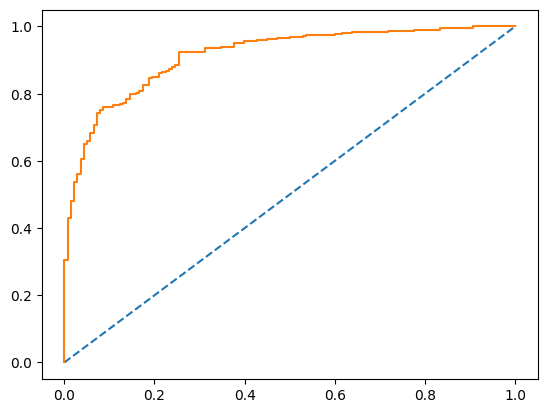

In [46]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

**Model Evaluation**

83% accuracy for training data.

83% accuracy on test data.

AUC score 87% & 89% for both train and test indicate that model has perfom quite good in both the occasions.



1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

**KNN model**

In [47]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
##Performance matrix on train data
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8463713477851084
[[227  95]
 [ 68 671]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [49]:
##Performance matrix on test data
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8004385964912281
[[ 87  51]
 [ 40 278]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       138
           1       0.84      0.87      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.80      0.80      0.80       456



**AUC and ROC for the train and test data**

AUC: 0.918


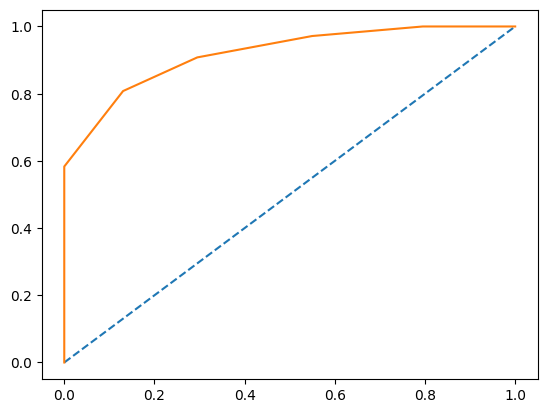

In [50]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.858


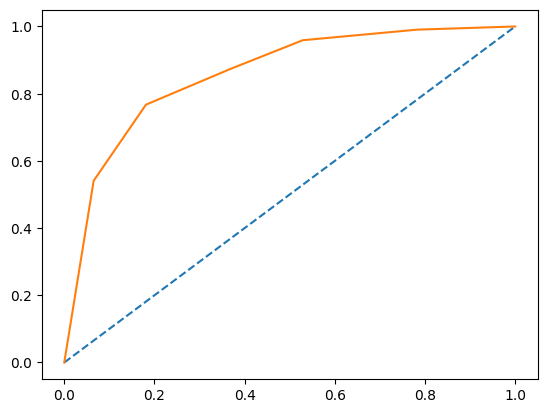

In [51]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

Here we have observed that with KNN both train and test data has given 86% and 82% respectively accuracy.

It has predicted similar range of previous models.

**Naïve Bayes Model**

In [52]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [53]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8199811498586239
[[226  96]
 [ 95 644]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [54]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8574561403508771
[[100  38]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



**AUC and ROC for the train and test data**

AUC: 0.873


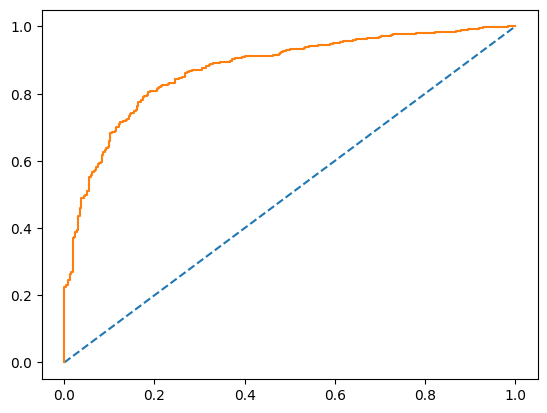

In [55]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.912


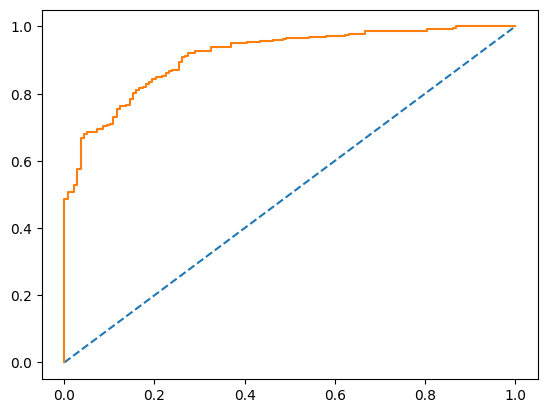

In [56]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

Naïve Bayes Model has also given simler range of accuracy on both training and test data.

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.


**Bagging**

As bagging can reduce varaince to avoid overfitting hence using RandomForestClssifier to check.

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [58]:
cart = RandomForestClassifier()
Bagging_model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=1)
Bagging_model.fit(X_train, y_train)
#Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [59]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[298  24]
 [ 10 729]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       322
           1       0.97      0.99      0.98       739

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [60]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8508771929824561
[[ 95  43]
 [ 25 293]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.82       456
weighted avg       0.85      0.85      0.85       456



**AUC and ROC for the train and test data**

AUC: 0.997


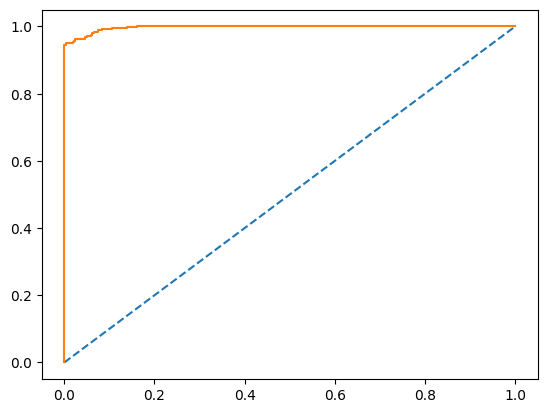

In [61]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.911


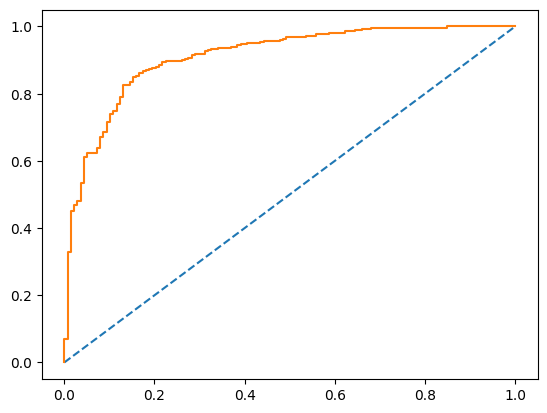

In [62]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

**Observations:**

As we can see it has performed really well on train data however the accuracy is quite low on test data.

**Boosting**
will use AdaBoosting mathod here

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [65]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8491988689915174
[[228  94]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [66]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[ 95  43]
 [ 32 286]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       138
           1       0.87      0.90      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



**AUC and ROC for the train and test data**

AUC: 0.904


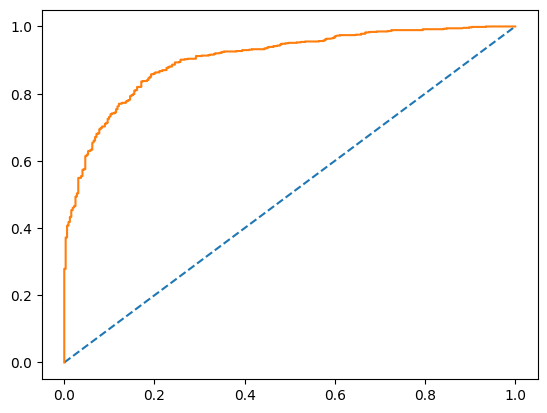

In [67]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.908


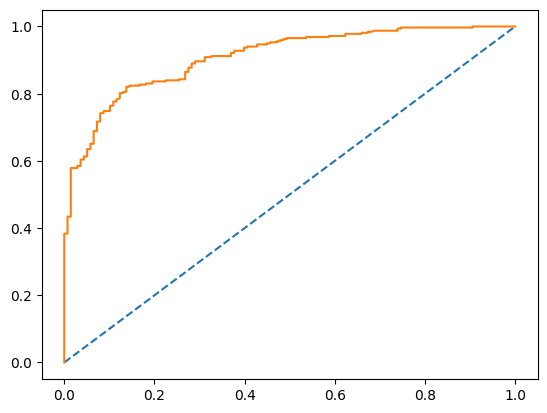

In [68]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.

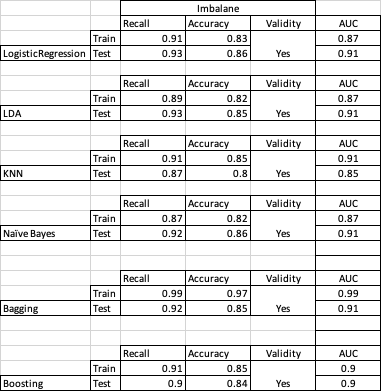

**Final Model:**
Compare the models and write inference which model is best/optimised.

All Model has performed well hewever logistic and LDA havbing little edge over others consider the AUC values.

**Inference:**

1.8 Based on these predictions, what are the insights?

Bssed on the observations the LDA and Logical models are good to predict the exit polls.

As per the prediction on all models, majority of the population 35-60 having considerable political knowledge and are likly to vote for Labour party.